# Calorie Burnt Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [2]:
calorie = pd.read_csv('calories.csv')

In [3]:
calorie.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
calorie.shape

(15000, 2)

In [5]:
calorie.isnull().sum()

User_ID     0
Calories    0
dtype: int64

In [6]:
exercise_dataset = pd.read_csv('exercise.csv')

In [7]:
exercise_dataset.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [8]:
exercise_dataset.shape

(15000, 8)

In [9]:
exercise_dataset.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

In [10]:
calorie_dataset = pd.concat([exercise_dataset, calorie['Calories']], axis = 1)

In [11]:
calorie_dataset.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [12]:
calorie_dataset.shape

(15000, 9)

In [13]:
calorie_dataset.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [14]:
calorie_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [15]:
calorie_dataset.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


# Data Visualization

In [16]:
sns.set()

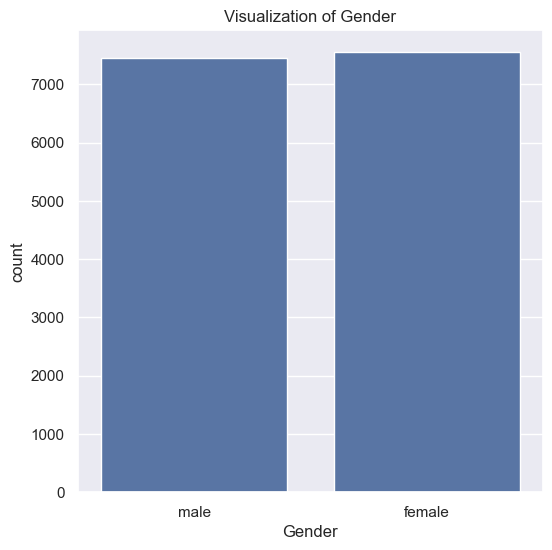

In [17]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'Gender', data = calorie_dataset)
plt.title('Visualization of Gender')
plt.show()

In [18]:
calorie_dataset['Gender'].value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

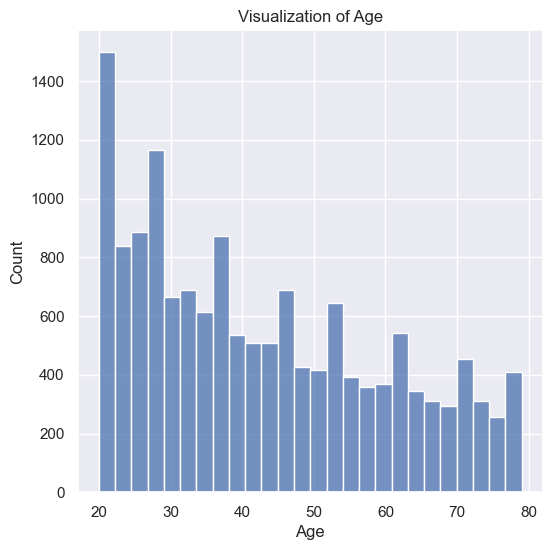

In [19]:
plt.figure(figsize = (6,6))
sns.histplot(calorie_dataset['Age'])
plt.title('Visualization of Age')
plt.show()

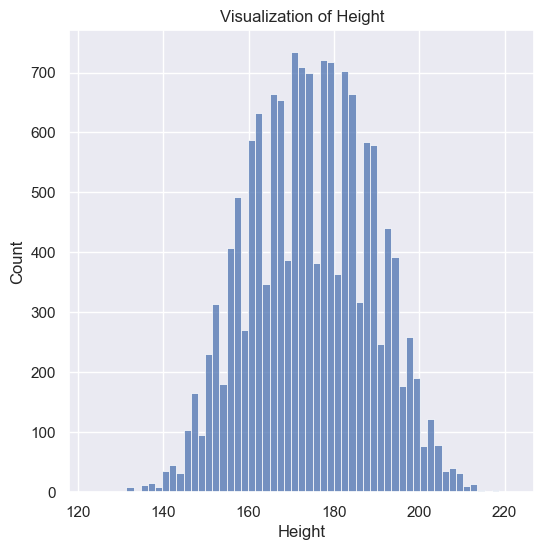

In [20]:
plt.figure(figsize = (6,6))
sns.histplot(calorie_dataset['Height'])
plt.title('Visualization of Height')
plt.show()

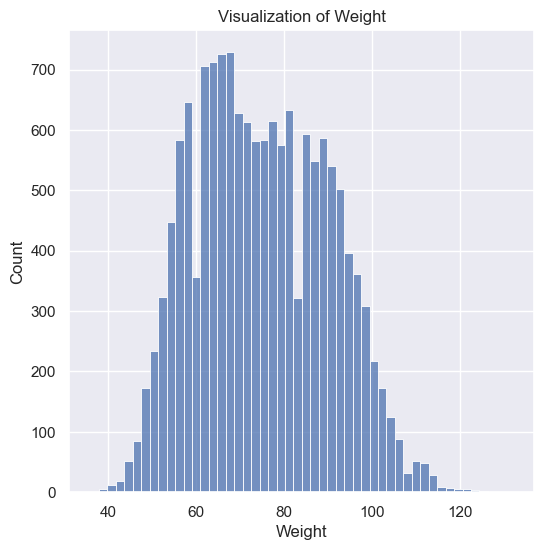

In [21]:
plt.figure(figsize = (6,6))
sns.histplot(calorie_dataset['Weight'])
plt.title('Visualization of Weight')
plt.show()

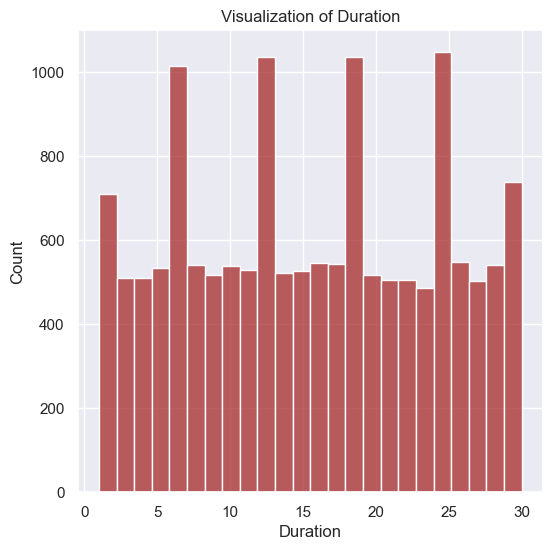

In [22]:
plt.figure(figsize = (6,6))
sns.histplot(calorie_dataset['Duration'], color = 'brown')
plt.title('Visualization of Duration')
plt.show()

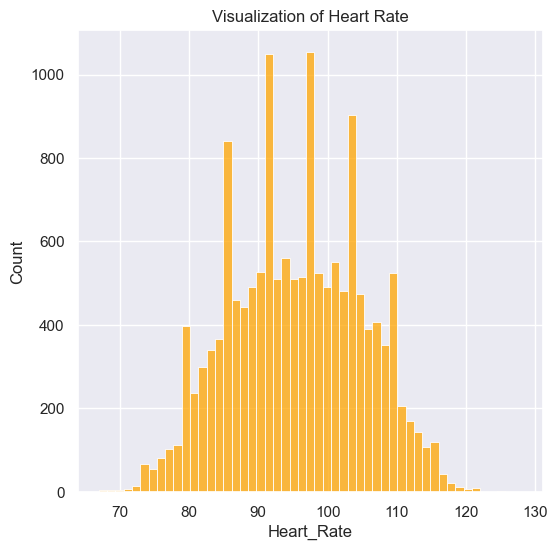

In [23]:
plt.figure(figsize = (6,6))
sns.histplot(calorie_dataset['Heart_Rate'], color = 'orange')
plt.title('Visualization of Heart Rate')
plt.show()

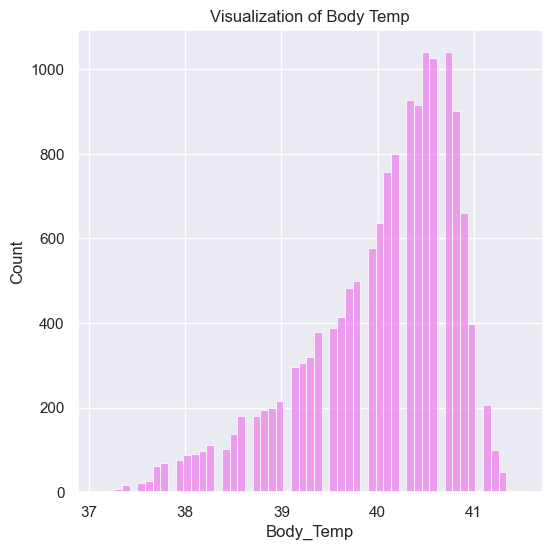

In [24]:
plt.figure(figsize = (6,6))
sns.histplot(calorie_dataset['Body_Temp'], color = 'violet')
plt.title('Visualization of Body Temp')
plt.show()

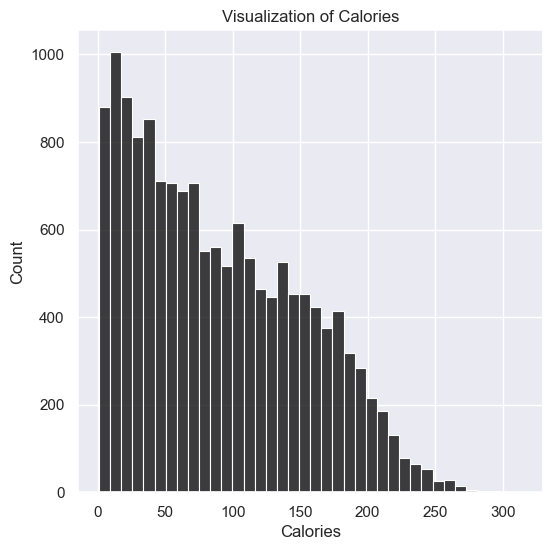

In [25]:
plt.figure(figsize = (6,6))
sns.histplot(calorie_dataset['Calories'], color = 'Black')
plt.title('Visualization of Calories')
plt.show()

# Finding the correlation in the dataset

1. Positive Correaltion 
2. Negative Correaltion

In [26]:
calories = calorie_dataset.drop(['Gender'], axis = 1)

In [27]:
correlation = calories.corr()

<Axes: >

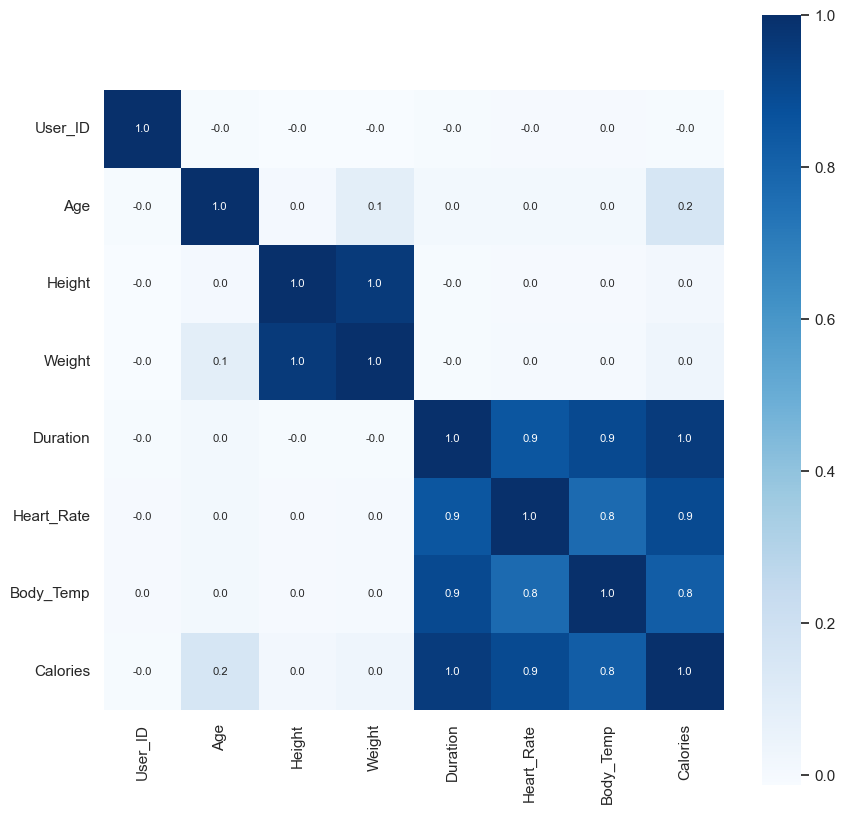

In [28]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')


In [29]:
calorie_dataset.replace({'Gender':{'male':0, 'female':1}}, inplace = True)
calorie_dataset.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [30]:
X = calorie_dataset.drop(['User_ID', 'Calories'], axis = 1)
Y = calorie_dataset['Calories']

In [31]:
print(X)
print(Y)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]
0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999   

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [33]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


In [34]:
linear_regression_model = LinearRegression()

In [35]:
linear_regression_model.fit(X, Y)

LinearRegression()

In [36]:
train_model_prediction = linear_regression_model.predict(X_train)

In [37]:
r2_error = metrics.r2_score(Y_train, train_model_prediction)
print(r2_error)

0.9672713868827023


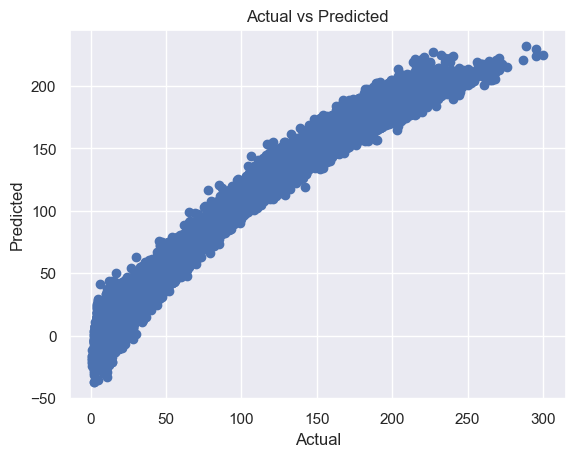

In [38]:
plt.scatter(Y_train, train_model_prediction)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [39]:
test_model_prediction = linear_regression_model.predict(X_test)

In [40]:
r2_error_test = metrics.r2_score(Y_test, test_model_prediction)
print(r2_error_test)

0.9669222220608059


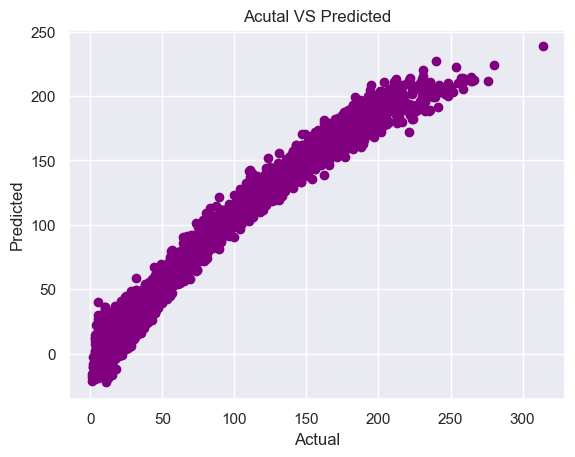

In [41]:
plt.scatter(Y_test, test_model_prediction, color = 'purple')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Acutal VS Predicted')
plt.show()

In [42]:
import joblib

# Save the model
joblib.dump(linear_regression_model, 'calorie_prediction_model.joblib')

['calorie_prediction_model.joblib']